In [2]:
import re
import pandas as pd
from nltk.translate.meteor_score import single_meteor_score
from nltk.translate.chrf_score import sentence_chrf

In [ ]:
df = pd.read_csv('test_results.csv', index_col=0, delimiter='|')
df

,english,BART_base,BART_large,GPT_2:temp=0.2,GPT_2:temp=0.5,GPT_2:temp=0.7,GPT_2:temp=1.0
sumerian,,,,,,,
...guruš engar dumu-ni ...ur-mes 1(u) 1(diš) guruš ugula ur-lugal 8(diš) guruš ugula ab-ba-sag₁₀ 6(diš) guruš ugula lugal-ku₃-zu 3(diš) guruš ugula šeš-kal-la 2(diš) guruš ugula lugal-iti-da 4(diš) guruš ugula lu₂-dingir-ra 7(diš) guruš ugula ur-am₃-ma 4(diš) guruš ugula ur-e₂-nun-na 1(geš₂) guruš ugula al-la-igi-še₃-du gurum₂ u₄ 2(diš)-kam ki-su₇ ka-ma-ri₂ gub-ba giri₃ i₃-kal-la iti še-kar-ra-gal₂-la mu {d}šu{d}suen lugal uri₅-ma{ki}...da za-ab-ša-li{ki} mu-hul,"n male laborers, plowman and his sons, foreman...","n male laborers, plowmen, son of Umes; 11 male...","n male laborers, plow-oxen, for Ur-mes; 11 lab...",Translation Error,Translation Error,Translation Error,Translation Error
1(diš) udu gir-ru-um niga 2(diš) udu eme-gi-ra nita₂ ma₂-an-na unu{ki} iti-ta u₄ 2(u) 6(diš) ba-ra-zal ki lugal-nir-ta giri₃ ba-qar-tum iti {d}dumu-zi mu en {d}inana unu{ki} maš₂-e i₃-pa₃ {d}šu{d}suen lugal kal-ga lugal uri₅{ki}ma lugal an ub-da limmu₂-ba wa-qar-tum nin₉-a-ni,"1 kirrum sheep, grain-fed, 2 emegi rams, for H...","1 sheep, Girru-um, grain-fed; 2 sheep, eme-gir...","1 sheep Girrum, barley-fed, 2 sheep Eme-gira, ...",1(diš) udu gir-ru-um niga 2(diš) udu eme-gi-r...,1(diš) udu gir-ru-um niga 2(diš) udu eme-gi-r...,1(diš) udu gir-ru-um niga 2(diš) udu eme-gi-r...,1(diš) udu gir-ru-um niga 2(diš) udu eme-gi-r...
2(diš) udu-nita₂ kur-ra bar-gal₂ 1(diš) sila₄ nita₂ kur-ra bar-gal₂ ri-ri-ga ki ur-ru-ta kišib₃ lu₂-kal-la iti {d}li₉-si₄ mu hu-uh₂-nu-ri{ki} ba-hul lu₂-kal-la dub-sar dumu ur-e₁₁-e šuš₃,"2 male sheep of the mountain, with fleece, 1 m...","2 rams, mountain range, barigal; 1 male lamb, ...","2 rams, grass-fed, full-grown, bar-gal; 1 lamb...","1 sheep, barley-fed, “barley-fed” (for) the Ki...","1 sheep, barley-fed, “barley-fed” (for) the Ki...","1 sheep, barley-fed, “barley-fed” (for) the Ki...","1 sheep, barley-fed, “barley-fed” (for) the Ki..."
...nin₉ ki aŋ₂ {d}dumu-zid-de₃ ...gur₃-ru ki aŋ₂ {d}dur₇-dur₇-e a...zid-de₃ šag₄-ga ri-a nin₉-ŋu₁₀ nam-nin-e tud-da {e₂}tur₃-e i₃ gara₂...mu-un-da-ab-si amaš-e i₃...un-da-an <unk>... an-eden-ne₂...a-ŋu₁₀ {d}ŋeštin-an-na me-en a ki-sikil...nam dumu banda₃{da}...na-nam unug{ki}ga...bi na-nam kul-aba₄{ki}...bi na-nam mu-ut-tin-na me-en ru-ru-a na-nam ki-sikil-e...šeš-a-na... igi mu-un-na-hur kiri₃ mu-un-na... ki lu₂-da nu-u₆-di haš₂-gal mu-na... e₂-eš₂-dam e₂-gal-la si ba-ni-in-sa₂ sukkal lu₂ e₂-gal-la-ta e₃-a ki-sikil-e en₃{en} mu-un-tar-re-en sukkal lu₂ e₂-gal-la-ta e₃-a ki-sikil-ra mu-un-na-ni-ib-gi₄-gi₄ šeš-zu nam-en-še₃ šu mu-un-ŋa₂-ŋa₂-a nam-en unug{ki}ga <unk> <unk>...e me hal-hal-ne u išib-ne ki za-za-a-ne a-tu₅-a-tu₅-a-ne susbu₂{be₂}e-ne itud-da eš₃ gal-e e₃-ne muš₃ nu-tum₂-mu-ne šeš-zu nam-en-še₃ šu mu-un-ŋa₂-ŋa₂-a ud-bi-a imin he₂-en-na-me-eš imin he₂-en-na-me-eš šir₃ dug₄-dug₄ unug{ki}ga imin me-eš zabalam{ki} ad ša₄-ša₄ ninnu me-eš e-ne-ne an-na mul zu me-eš ki har-ra-an zu me-eš an-na mul zu <unk> il₂-la me-eš e-ne-ne šir₃ im-zi-zi-ne šir₃ im-ŋa₂-ŋa₂-ne šir₃-e saŋ-bi nu-mu-un-ne-pad₃-ne ad-da ki-gub-ba nu-mu-un-ŋa₂-ŋa₂ me-eš nin₉ banda₃{da} <unk> bi-a til₃-la gu₃ mu-un-na-de₂-e gaba ba-da-ab-gu-la gaba ba-da-ab...gu₃ mu-un... me-e-de₃ šir₃ im-zi-zi-ne e-ne-ne...ŋa₂-ŋa₂-ze₂-en ...bi-a nu-mu-un-til₃ ...ma-ka mu-un-til₃ ...ma kur kug za-gin₃-a-ka <unk> dim-ma-ba mu-un-til₃,... beloved sister of Dumuzi Exuding/bearing ....,"Nin, from the sand dunes of Dumuzi, on the ban...","... from the temple of Dumu-zidde, ... from th...",Translation Error,Translation Error,Translation Error,Translation Error
<unk> nin dub-sar dumu šeš-kal-la,"Šu-Suen, strong king, king of Ur: Aḫuni, cup-b...",Basket-of-tablets: xxx xxx,"Nin, scribe, son of Šeškalla.","Šū-Nin, scribe, son of Šeškalla. Šu-Šimašda, h...","Šū-Nin, scribe, son of Šeškalla. Šu-Sukkalla, ...","Šū-Nin, scribe, son of Šeškalla. Šu-Sîn, his b...","Šū-Nin, scribe, son of Šeškalla. Ša-bani, his ..."
...,...,...,...,...,...,...,...
gan-

In [23]:
# for each row, compute the METEOR and chrF scores for each model
def compute_scores(row):
    scores = {}
    for model in ['BART_base', 'BART_large', 'GPT_2:temp=0.2', 'GPT_2:temp=0.5', 'GPT_2:temp=0.7', 'GPT_2:temp=1.0']:
        if pd.isna(row[model]):
            continue
        # Extract the reference and hypothesis from the row
        ref = row['english']
        hyp = row[model]
        
        # Compute METEOR score
        meteor_score = single_meteor_score(ref.split(), hyp.split())
        
        # Compute chrF score
        chrf_score = sentence_chrf(ref, hyp)
        
        scores[model] = {
            'meteor': meteor_score,
            'chrf': chrf_score
        }

    return pd.Series(scores)

# Apply the compute_scores function to each row
df_scores = df.apply(compute_scores, axis=1)

# split in meteor and chrF tables
df_meteor = df_scores.apply(lambda x: pd.Series({k: v['meteor'] for k, v in x.items()}), axis=1)
df_chrf = df_scores.apply(lambda x: pd.Series({k: v['chrf'] for k, v in x.items()}), axis=1)

In [24]:
df_meteor

,BART_base,BART_large,GPT_2:temp=0.2,GPT_2:temp=0.5,GPT_2:temp=0.7,GPT_2:temp=1.0
sumerian,,,,,,
...guruš engar dumu-ni ...ur-mes 1(u) 1(diš) guruš ugula ur-lugal 8(diš) guruš ugula ab-ba-sag₁₀ 6(diš) guruš ugula lugal-ku₃-zu 3(diš) guruš ugula šeš-kal-la 2(diš) guruš ugula lugal-iti-da 4(diš) guruš ugula lu₂-dingir-ra 7(diš) guruš ugula ur-am₃-ma 4(diš) guruš ugula ur-e₂-nun-na 1(geš₂) guruš ugula al-la-igi-še₃-du gurum₂ u₄ 2(diš)-kam ki-su₇ ka-ma-ri₂ gub-ba giri₃ i₃-kal-la iti še-kar-ra-gal₂-la mu {d}šu{d}suen lugal uri₅-ma{ki}...da za-ab-ša-li{ki} mu-hul,0.315567,0.310207,0.000000,0.000000,0.000000,0.000000
1(diš) udu gir-ru-um niga 2(diš) udu eme-gi-ra nita₂ ma₂-an-na unu{ki} iti-ta u₄ 2(u) 6(diš) ba-ra-zal ki lugal-nir-ta giri₃ ba-qar-tum iti {d}dumu-zi mu en {d}inana unu{ki} maš₂-e i₃-pa₃ {d}šu{d}suen lugal kal-ga lugal uri₅{ki}ma lugal an ub-da limmu₂-ba wa-qar-tum nin₉-a-ni,0.627407,0.660045,0.000000,0.000000,0.000000,0.000000
2(diš) udu-nita₂ kur-ra bar-gal₂ 1(diš) sila₄ nita₂ kur-ra bar-gal₂ ri-ri-ga ki ur-ru-ta kišib₃ lu₂-kal-la iti {d}li₉-si₄ mu hu-uh₂-nu-ri{ki} ba-hul lu₂-kal-la dub-sar dumu ur-e₁₁-e šuš₃,0.533434,0.419896,0.228237,0.245055,0.224820,0.174378
...nin₉ ki aŋ₂ {d}dumu-zid-de₃ ...gur₃-ru ki aŋ₂ {d}dur₇-dur₇-e a...zid-de₃ šag₄-ga ri-a nin₉-ŋu₁₀ nam-nin-e tud-da {e₂}tur₃-e i₃ gara₂...mu-un-da-ab-si amaš-e i₃...un-da-an <unk>... an-eden-ne₂...a-ŋu₁₀ {d}ŋeštin-an-na me-en a ki-sikil...nam dumu banda₃{da}...na-nam unug{ki}ga...bi na-nam kul-aba₄{ki}...bi na-nam mu-ut-tin-na me-en ru-ru-a na-nam ki-sikil-e...šeš-a-na... igi mu-un-na-hur kiri₃ mu-un-na... ki lu₂-da nu-u₆-di haš₂-gal mu-na... e₂-eš₂-dam e₂-gal-la si ba-ni-in-sa₂ sukkal lu₂ e₂-gal-la-ta e₃-a ki-sikil-e en₃{en} mu-un-tar-re-en sukkal lu₂ e₂-gal-la-ta e₃-a ki-sikil-ra mu-un-na-ni-ib-gi₄-gi₄ šeš-zu nam-en-še₃ šu mu-un-ŋa₂-ŋa₂-a nam-en unug{ki}ga <unk> <unk>...e me hal-hal-ne u išib-ne ki za-za-a-ne a-tu₅-a-tu₅-a-ne susbu₂{be₂}e-ne itud-da eš₃ gal-e e₃-ne muš₃ nu-tum₂-mu-ne šeš-zu nam-en-še₃ šu mu-un-ŋa₂-ŋa₂-a ud-bi-a imin he₂-en-na-me-eš imin he₂-en-na-me-eš šir₃ dug₄-dug₄ unug{ki}ga imin me-eš zabalam{ki} ad ša₄-ša₄ ninnu me-eš e-ne-ne an-na mul zu me-eš ki har-ra-an zu me-eš an-na mul zu <unk> il₂-la me-eš e-ne-ne šir₃ im-zi-zi-ne šir₃ im-ŋa₂-ŋa₂-ne šir₃-e saŋ-bi nu-mu-un-ne-pad₃-ne ad-da ki-gub-ba nu-mu-un-ŋa₂-ŋa₂ me-eš nin₉ banda₃{da} <unk> bi-a til₃-la gu₃ mu-un-na-de₂-e gaba ba-da-ab-gu-la gaba ba-da-ab...gu₃ mu-un... me-e-de₃ šir₃ im-zi-zi-ne e-ne-ne...ŋa₂-ŋa₂-ze₂-en ...bi-a nu-mu-un-til₃ ...ma-ka mu-un-til₃ ...ma kur kug za-gin₃-a-ka <unk> dim-ma-ba mu-un-til₃,0.175647,0.154179,0.000000,0.000000,0.000000,0.000000
<unk> nin dub-sar dumu šeš-kal-la,0.000000,0.048077,0.092025,0.059880,0.034965,0.227273
...,...,...,...,...,...,...
gan-kun-sig eriš-dingir {d}pa-bil₃-sag,0.000000,0.064935,0.106383,0.115385,0.192147,0.141509
2(u) ma-na siki ki ur-ba-ba-ta da-da-mu šu ba-ti iti du₆-ku₃ mu {d}i-bi₂{d}suen lugal da-da-mu dub-sar dumu a-lu₅-lu₅,0.291975,0.216441,0.134529,0.134529,0.182648,0.186916
1(u) 1(diš) sila₄ niga sa₂-du₁₁ u₄ 1(u) 1(diš)-kam 4(diš) sila₄ ga ka-izi-še₃ ur{d}ba-ba₆ i₃-dab₅ 1(u) 2(diš) sila₄ niga sa₂-du₁₁ u₄ 1(u) 2(diš)-kam 2(diš) sila₄ niga uzu elam-še₃ 7(diš) sila₄ ga ka-izi-še₃ a-a-kal-la i₃-dab₅ sa₂-du₁₁ lugal kišib₃ {d}nanna-an-dul₃ ki na-lu₅-ta ba-zi iti maš-da₃-gu₇ mu {d}gu-za {d}en-lil₂-la₂ ba-dim₂,0.487129,0.339422,0.000000,0.000000,0.000000,0.000000


In [25]:
df_chrf

,BART_base,BART_large,GPT_2:temp=0.2,GPT_2:temp=0.5,GPT_2:temp=0.7,GPT_2:temp=1.0
sumerian,,,,,,
...guruš engar dumu-ni ...ur-mes 1(u) 1(diš) guruš ugula ur-lugal 8(diš) guruš ugula ab-ba-sag₁₀ 6(diš) guruš ugula lugal-ku₃-zu 3(diš) guruš ugula šeš-kal-la 2(diš) guruš ugula lugal-iti-da 4(diš) guruš ugula lu₂-dingir-ra 7(diš) guruš ugula ur-am₃-ma 4(diš) guruš ugula ur-e₂-nun-na 1(geš₂) guruš ugula al-la-igi-še₃-du gurum₂ u₄ 2(diš)-kam ki-su₇ ka-ma-ri₂ gub-ba giri₃ i₃-kal-la iti še-kar-ra-gal₂-la mu {d}šu{d}suen lugal uri₅-ma{ki}...da za-ab-ša-li{ki} mu-hul,0.529934,0.517060,0.010919,0.010919,0.010919,0.010919
1(diš) udu gir-ru-um niga 2(diš) udu eme-gi-ra nita₂ ma₂-an-na unu{ki} iti-ta u₄ 2(u) 6(diš) ba-ra-zal ki lugal-nir-ta giri₃ ba-qar-tum iti {d}dumu-zi mu en {d}inana unu{ki} maš₂-e i₃-pa₃ {d}šu{d}suen lugal kal-ga lugal uri₅{ki}ma lugal an ub-da limmu₂-ba wa-qar-tum nin₉-a-ni,0.661419,0.695209,0.136381,0.136381,0.136381,0.138848
2(diš) udu-nita₂ kur-ra bar-gal₂ 1(diš) sila₄ nita₂ kur-ra bar-gal₂ ri-ri-ga ki ur-ru-ta kišib₃ lu₂-kal-la iti {d}li₉-si₄ mu hu-uh₂-nu-ri{ki} ba-hul lu₂-kal-la dub-sar dumu ur-e₁₁-e šuš₃,0.573911,0.495541,0.248846,0.276778,0.247800,0.217793
...nin₉ ki aŋ₂ {d}dumu-zid-de₃ ...gur₃-ru ki aŋ₂ {d}dur₇-dur₇-e a...zid-de₃ šag₄-ga ri-a nin₉-ŋu₁₀ nam-nin-e tud-da {e₂}tur₃-e i₃ gara₂...mu-un-da-ab-si amaš-e i₃...un-da-an <unk>... an-eden-ne₂...a-ŋu₁₀ {d}ŋeštin-an-na me-en a ki-sikil...nam dumu banda₃{da}...na-nam unug{ki}ga...bi na-nam kul-aba₄{ki}...bi na-nam mu-ut-tin-na me-en ru-ru-a na-nam ki-sikil-e...šeš-a-na... igi mu-un-na-hur kiri₃ mu-un-na... ki lu₂-da nu-u₆-di haš₂-gal mu-na... e₂-eš₂-dam e₂-gal-la si ba-ni-in-sa₂ sukkal lu₂ e₂-gal-la-ta e₃-a ki-sikil-e en₃{en} mu-un-tar-re-en sukkal lu₂ e₂-gal-la-ta e₃-a ki-sikil-ra mu-un-na-ni-ib-gi₄-gi₄ šeš-zu nam-en-še₃ šu mu-un-ŋa₂-ŋa₂-a nam-en unug{ki}ga <unk> <unk>...e me hal-hal-ne u išib-ne ki za-za-a-ne a-tu₅-a-tu₅-a-ne susbu₂{be₂}e-ne itud-da eš₃ gal-e e₃-ne muš₃ nu-tum₂-mu-ne šeš-zu nam-en-še₃ šu mu-un-ŋa₂-ŋa₂-a ud-bi-a imin he₂-en-na-me-eš imin he₂-en-na-me-eš šir₃ dug₄-dug₄ unug{ki}ga imin me-eš zabalam{ki} ad ša₄-ša₄ ninnu me-eš e-ne-ne an-na mul zu me-eš ki har-ra-an zu me-eš an-na mul zu <unk> il₂-la me-eš e-ne-ne šir₃ im-zi-zi-ne šir₃ im-ŋa₂-ŋa₂-ne šir₃-e saŋ-bi nu-mu-un-ne-pad₃-ne ad-da ki-gub-ba nu-mu-un-ŋa₂-ŋa₂ me-eš nin₉ banda₃{da} <unk> bi-a til₃-la gu₃ mu-un-na-de₂-e gaba ba-da-ab-gu-la gaba ba-da-ab...gu₃ mu-un... me-e-de₃ šir₃ im-zi-zi-ne e-ne-ne...ŋa₂-ŋa₂-ze₂-en ...bi-a nu-mu-un-til₃ ...ma-ka mu-un-til₃ ...ma kur kug za-gin₃-a-ka <unk> dim-ma-ba mu-un-til₃,0.284453,0.278188,0.004057,0.004057,0.004057,0.004057
<unk> nin dub-sar dumu šeš-kal-la,0.048103,0.084374,0.241490,0.261548,0.204833,0.331582
...,...,...,...,...,...,...
gan-kun-sig eriš-dingir {d}pa-bil₃-sag,0.144142,0.224903,0.208180,0.213048,0.174606,0.317884
2(u) ma-na siki ki ur-ba-ba-ta da-da-mu šu ba-ti iti du₆-ku₃ mu {d}i-bi₂{d}suen lugal da-da-mu dub-sar dumu a-lu₅-lu₅,0.516890,0.446019,0.458791,0.458791,0.492377,0.481273
1(u) 1(diš) sila₄ niga sa₂-du₁₁ u₄ 1(u) 1(diš)-kam 4(diš) sila₄ ga ka-izi-še₃ ur{d}ba-ba₆ i₃-dab₅ 1(u) 2(diš) sila₄ niga sa₂-du₁₁ u₄ 1(u) 2(diš)-kam 2(diš) sila₄ niga uzu elam-še₃ 7(diš) sila₄ ga ka-izi-še₃ a-a-kal-la i₃-dab₅ sa₂-du₁₁ lugal kišib₃ {d}nanna-an-dul₃ ki na-lu₅-ta ba-zi iti maš-da₃-gu₇ mu {d}gu-za {d}en-lil₂-la₂ ba-dim₂,0.569882,0.490326,0.013841,0.013841,0.013841,0.013841


In [ ]:
# summary of results
print("Summary of METEOR scores:")
display(df_meteor.describe().round(3))

print("\nSummary of chrF scores:")
display(df_chrf.describe().round(3))

Summary of METEOR scores:


,BART_base,BART_large,GPT_2:temp=0.2,GPT_2:temp=0.5,GPT_2:temp=0.7,GPT_2:temp=1.0
count,86.000,86.000,86.000,86.000,86.000,86.000
mean,0.475,0.446,0.216,0.213,0.215,0.213
std,0.318,0.310,0.227,0.222,0.218,0.205
min,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.174,0.136,0.000,0.000,0.000,0.000
50%,0.489,0.440,0.145,0.146,0.168,0.178
75%,0.785,0.706,0.367,0.373,0.352,0.356
max,1.000,0.999,0.836,0.811,0.811,0.816



Summary of chrF scores:


,BART_base,BART_large,GPT_2:temp=0.2,GPT_2:temp=0.5,GPT_2:temp=0.7,GPT_2:temp=1.0
count,86.000,86.000,86.000,86.000,86.000,86.000
mean,0.571,0.541,0.324,0.318,0.327,0.323
std,0.274,0.279,0.263,0.259,0.262,0.255
min,0.035,0.019,0.001,0.001,0.001,0.001
25%,0.317,0.279,0.037,0.033,0.037,0.037
50%,0.589,0.573,0.269,0.277,0.276,0.285
75%,0.815,0.759,0.534,0.542,0.544,0.524
max,1.000,1.000,0.791,0.791,0.791,0.791



Embedding Similarity Summary for BART_base:
count    86.000000
mean      0.774875
std       0.227607
min       0.060622
25%       0.628588
50%       0.863238
75%       0.943326
max       1.000000
Name: embed_cosine, dtype: float64

Top-3 Closest (High similarity):
                                                                                         reference_en  \
sumerian                                                                                                
a-lu₅-lu₅ dumu inim{d}šara₂ kurušda {d}šara₂-ka            Alulu, son of Inim-Šara, fattener of Šara.   
 {d}i-bi₂{d}suen lugal kal-ga lugal uri₅{ki}ma ...  Ibbi-Suen, strong king, king of Ur, king of th...   
 {d}šu{d}suen lugal kal-ga lugal uri₅{ki}ma lug...  Šū-Suen, strong king, king of Ur, king of the ...   

                                                                                         generated_en  \
sumerian                                                                                               

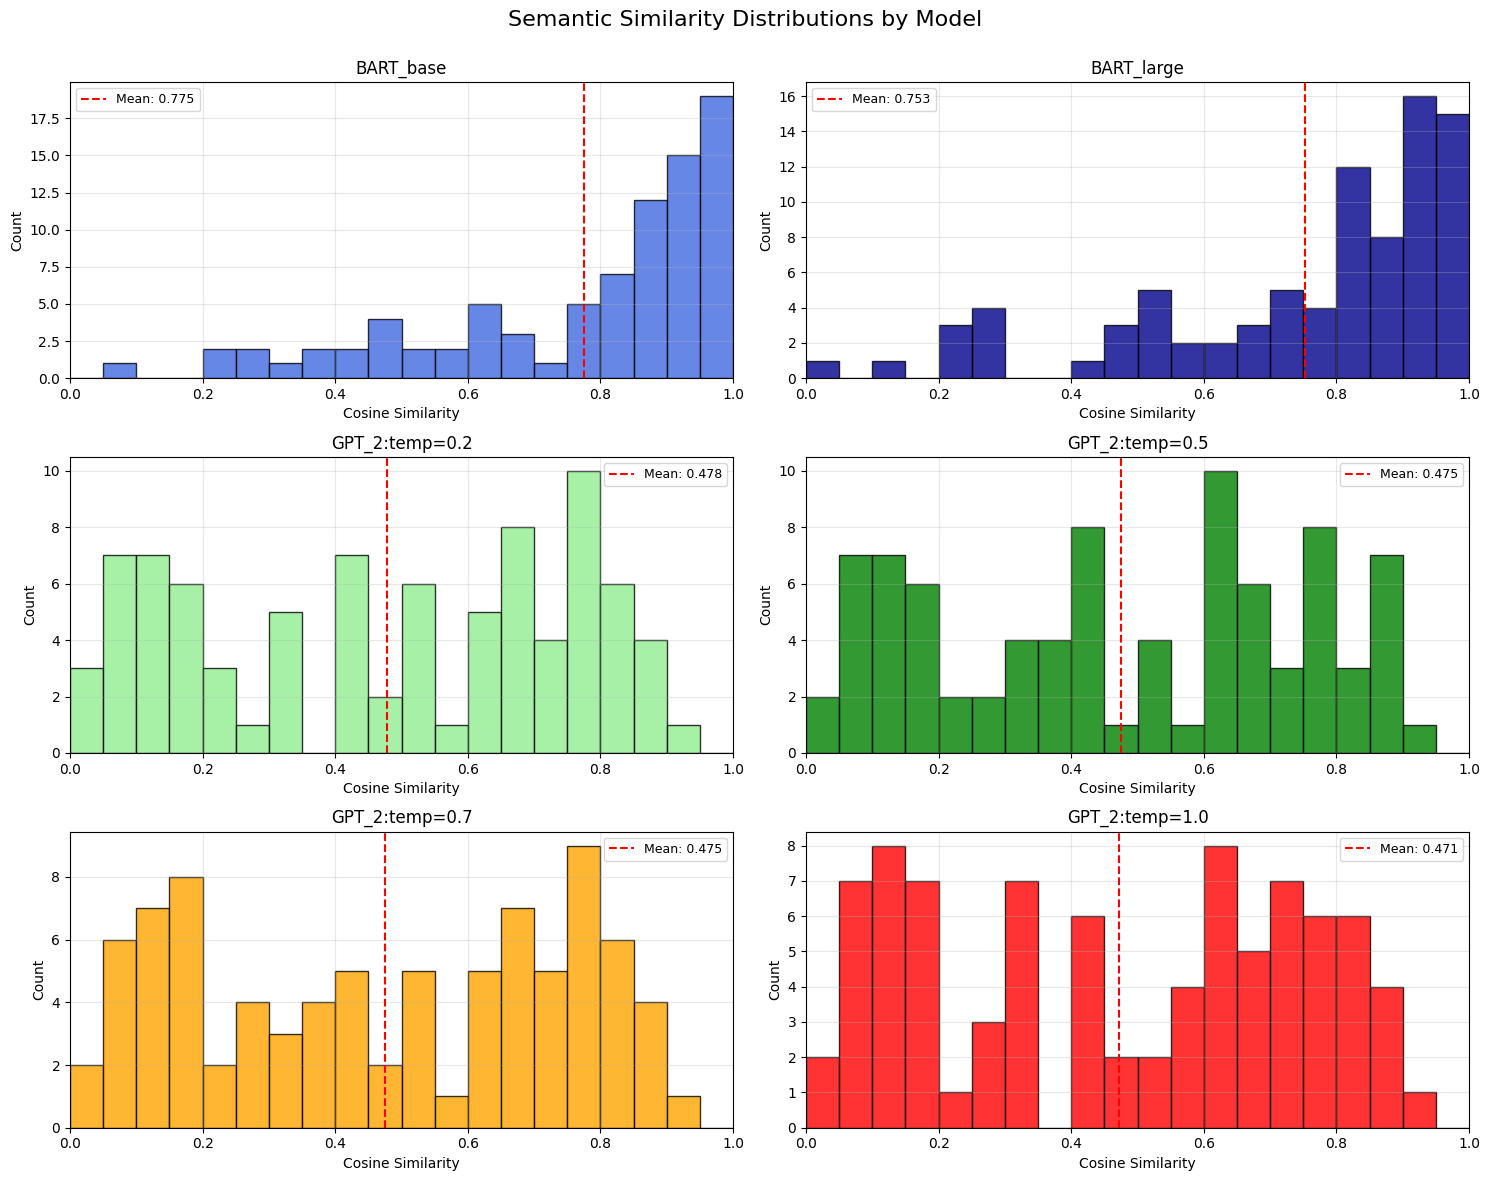

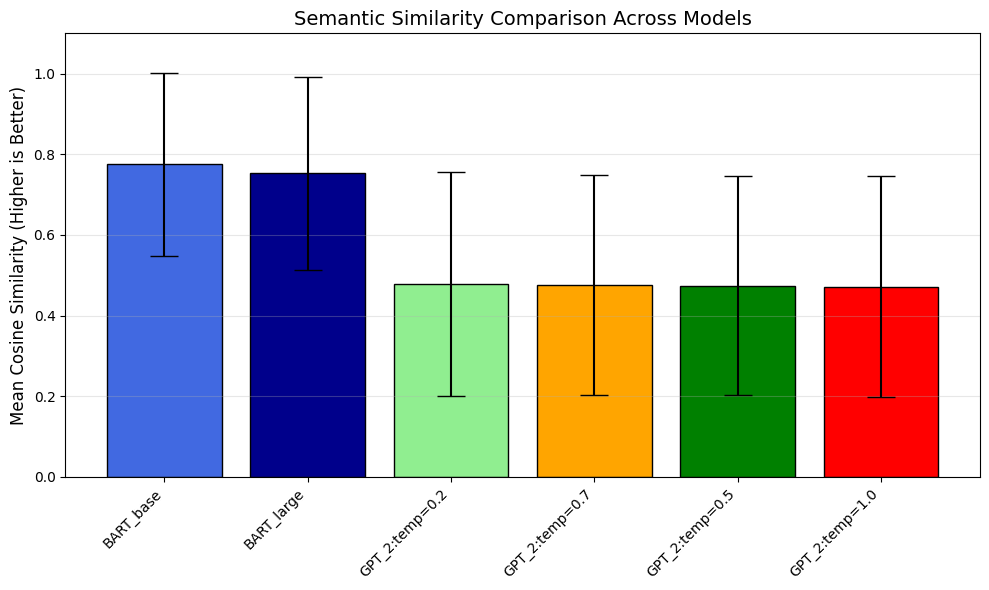


Model Comparison Summary:


,Model,Mean Similarity,Std Dev,Sample Size
0,BART_base,0.7749,0.2276,86
1,BART_large,0.7529,0.2391,86
2,GPT_2:temp=0.2,0.4783,0.2776,86
3,GPT_2:temp=0.7,0.4750,0.2729,86
4,GPT_2:temp=0.5,0.4745,0.2717,86
5,GPT_2:temp=1.0,0.4714,0.2744,86


In [39]:
import re
import pandas as pd
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer, util
import numpy as np

# Load existing dataframe from previous cells
# We'll calculate embedding similarity between reference translations and each model

# Prepare model for embedding calculation
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# We'll store results for each model in a dictionary
embedding_results = {}
model_colors = {
    'BART_base': 'royalblue',
    'BART_large': 'darkblue',
    'GPT_2:temp=0.2': 'lightgreen',
    'GPT_2:temp=0.5': 'green',
    'GPT_2:temp=0.7': 'orange',
    'GPT_2:temp=1.0': 'red'
}

# Calculate embedding similarity for each model
for model_col in ['BART_base', 'BART_large', 'GPT_2:temp=0.2', 'GPT_2:temp=0.5', 
                  'GPT_2:temp=0.7', 'GPT_2:temp=1.0']:
    
    # Create a temporary dataframe with only valid pairs (no NaN values)
    valid_rows = df[['english', model_col]].dropna()
    
    if len(valid_rows) == 0:
        print(f"No valid comparisons for {model_col}")
        continue
        
    # Rename columns for clarity
    temp_df = valid_rows.rename(columns={'english': 'reference_en', 
                                         model_col: 'generated_en'})
    
    # Strip whitespace
    temp_df["reference_en"] = temp_df["reference_en"].str.strip()
    temp_df["generated_en"] = temp_df["generated_en"].str.strip()
    
    # Encode all sentences into embeddings
    emb_ref = model.encode(temp_df["reference_en"].tolist(), convert_to_tensor=True)
    emb_gen = model.encode(temp_df["generated_en"].tolist(), convert_to_tensor=True)
    
    # Compute cosine similarities
    cosine_scores = util.cos_sim(emb_ref, emb_gen).diagonal().cpu().numpy()
    temp_df["embed_cosine"] = cosine_scores
    
    # Store results
    embedding_results[model_col] = {
        'df': temp_df,
        'scores': cosine_scores,
        'mean': temp_df["embed_cosine"].mean(),
        'std': temp_df["embed_cosine"].std(),
        'count': len(cosine_scores),
        'color': model_colors.get(model_col, 'gray')
    }
    
    # Print summary statistics separately
    print(f"\nEmbedding Similarity Summary for {model_col}:")
    print(temp_df["embed_cosine"].describe())
    
    print("\nTop-3 Closest (High similarity):")
    print(temp_df.nlargest(3, "embed_cosine")[["reference_en", "generated_en", "embed_cosine"]])
    
    print("\nTop-3 Furthest (Low similarity):")
    print(temp_df.nsmallest(3, "embed_cosine")[["reference_en", "generated_en", "embed_cosine"]])
    
    print("\n" + "-"*50 + "\n")

# Create a 3x2 grid of histograms, one for each model
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
axes = axes.flatten()  # Flatten for easier indexing
bins = np.linspace(0.0, 1.0, 21)  # Common bins from 0 to 1

# Plot each model in its own subplot
for i, (model_name, result) in enumerate(embedding_results.items()):
    ax = axes[i]
    color = result['color']
    
    # Create histogram
    ax.hist(result['scores'], bins=bins, color=color, edgecolor='black', alpha=0.8)
    
    # Add mean line
    ax.axvline(result['mean'], color='red', linestyle='--', 
               label=f'Mean: {result["mean"]:.3f}')
    
    # Add labels and styling
    ax.set_title(f"{model_name}", fontsize=12)
    ax.set_xlabel("Cosine Similarity", fontsize=10)
    ax.set_ylabel("Count", fontsize=10)
    ax.set_xlim(0, 1)
    ax.grid(alpha=0.3)
    ax.legend(fontsize=9)

# Add a big title
fig.suptitle("Semantic Similarity Distributions by Model", fontsize=16, y=0.98)
plt.tight_layout()
plt.subplots_adjust(top=0.92)  # Make room for the big title
plt.show()

# Create bar chart for comparison (same as before)
plt.figure(figsize=(10, 6))
means = [data['mean'] for model, data in embedding_results.items()]
stds = [data['std'] for model, data in embedding_results.items()]
models = list(embedding_results.keys())
colors = [model_colors.get(model, 'gray') for model in models]

# Sort by mean score (descending)
sorted_indices = np.argsort(means)[::-1]
models = [models[i] for i in sorted_indices]
means = [means[i] for i in sorted_indices]
stds = [stds[i] for i in sorted_indices]
colors = [colors[i] for i in sorted_indices]

plt.bar(models, means, yerr=stds, capsize=10, color=colors, edgecolor='black')
plt.title("Semantic Similarity Comparison Across Models", fontsize=14)
plt.ylabel("Mean Cosine Similarity (Higher is Better)", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.ylim(0, 1.1)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Create a data table for easy comparison
comparison_data = {
    'Model': models,
    'Mean Similarity': [f"{m:.4f}" for m in means],
    'Std Dev': [f"{s:.4f}" for s in stds],
    'Sample Size': [embedding_results[m]['count'] for m in models]
}

comparison_df = pd.DataFrame(comparison_data)
print("\nModel Comparison Summary:")
display(comparison_df)

  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.8.0/en_core_web_sm-3.8.0-py3-none-any.whl (12.8 MB)
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.

Syntactic LAS Summary for BART_base:
count    86.000000
mean      0.276181
std       0.304402
min       0.000000
25%       0.041364
50%       0.133744
75%       0.455729
max       1.000000
dtype: float64

Worst Syntactic Drift (lowest LAS):
                                                                                            reference  \
sumerian                                                                                                
2(diš) udu-nita₂ kur-ra bar-gal₂ 1(diš) sila₄ n...  2 male sheep of 

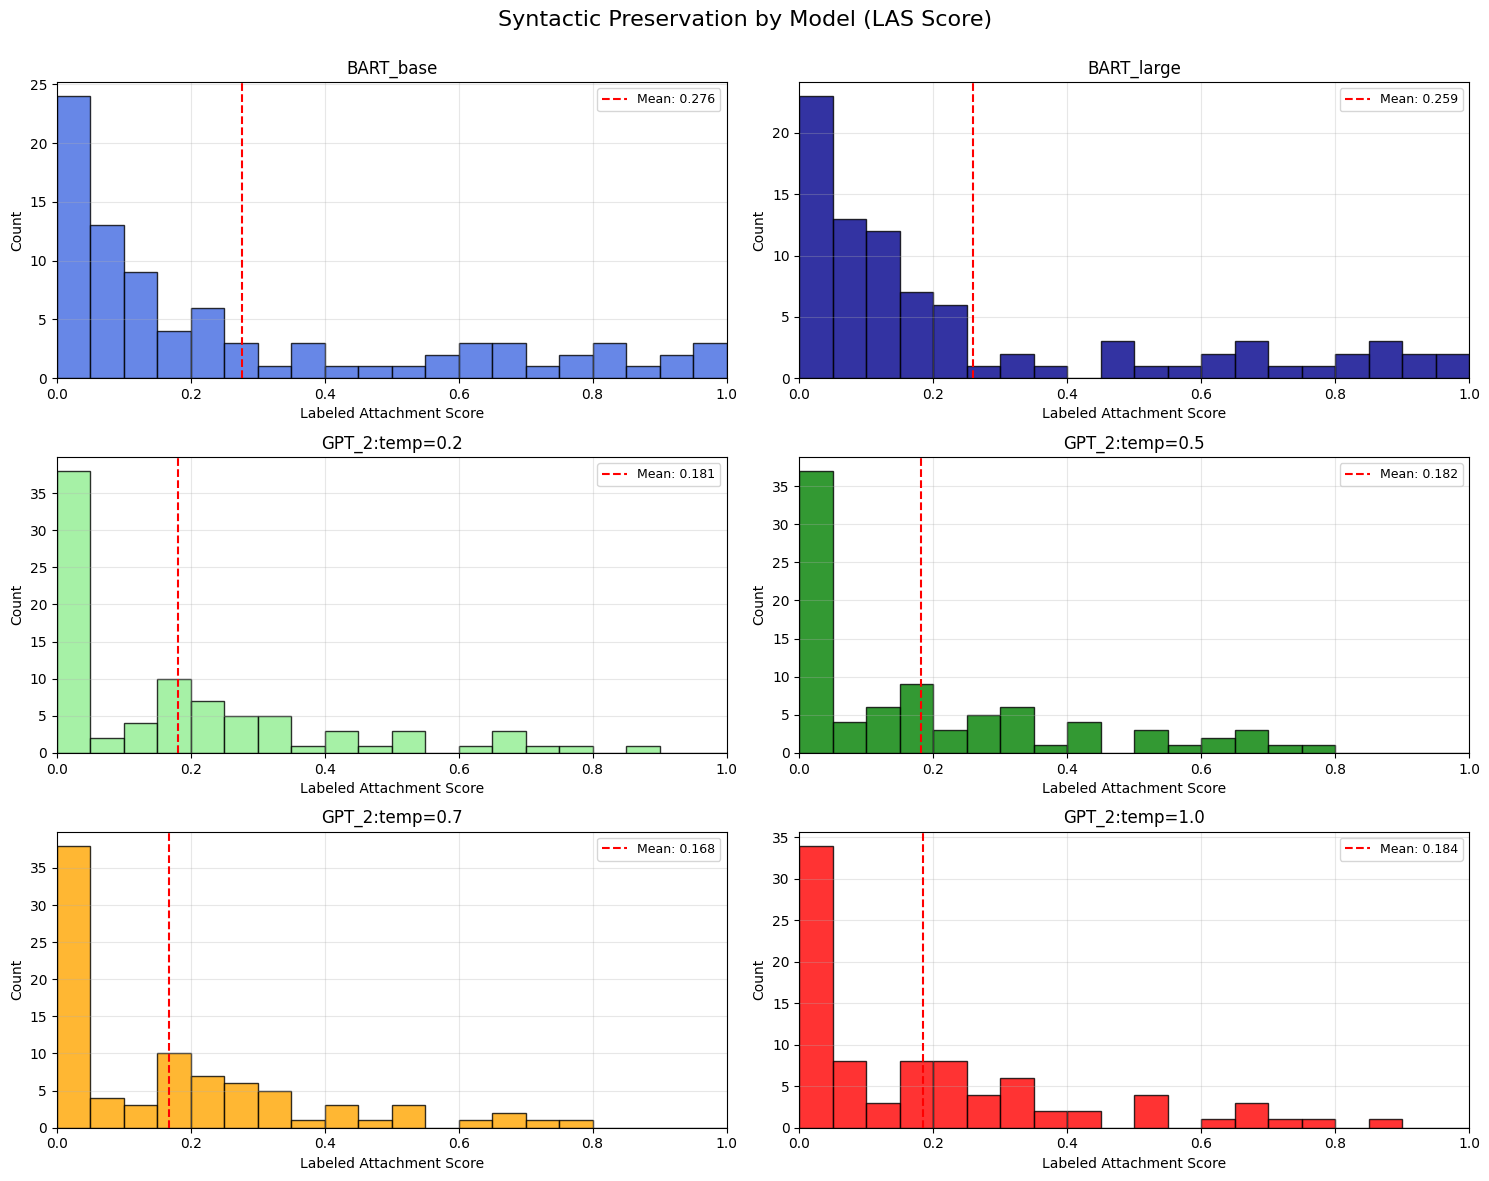

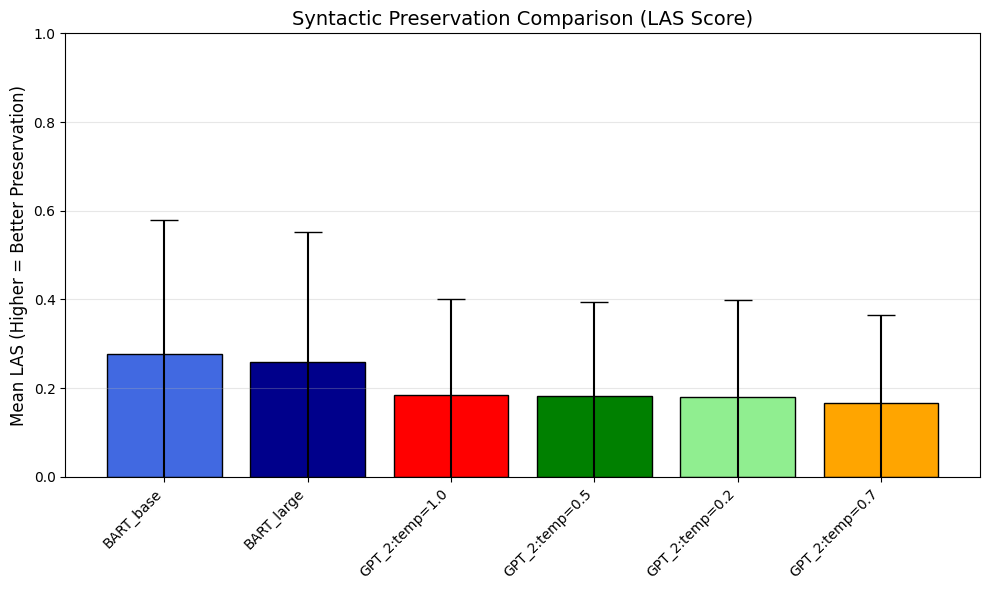


Syntactic Preservation Comparison:


,Model,Mean LAS,Std Dev,Sample Size
0,BART_base,0.2762,0.3026,86
1,BART_large,0.2587,0.2937,86
2,GPT_2:temp=1.0,0.1842,0.2164,86
3,GPT_2:temp=0.5,0.1821,0.2131,86
4,GPT_2:temp=0.2,0.1813,0.2173,86
5,GPT_2:temp=0.7,0.1676,0.1973,86


In [52]:
import re
import pandas as pd
import spacy
import matplotlib.pyplot as plt

# Ensure spaCy is installed
import spacy.cli
spacy.cli.download("en_core_web_sm")

# Load spaCy English parser
nlp = spacy.load("en_core_web_sm")

# We'll store syntax results for each model 
syntax_results = {}
model_colors = {
    'BART_base': 'royalblue',
    'BART_large': 'darkblue',
    'GPT_2:temp=0.2': 'lightgreen',
    'GPT_2:temp=0.5': 'green',
    'GPT_2:temp=0.7': 'orange',
    'GPT_2:temp=1.0': 'red'
}

# Calculate LAS for each model
for model_col in ['BART_base', 'BART_large', 'GPT_2:temp=0.2', 'GPT_2:temp=0.5', 
                  'GPT_2:temp=0.7', 'GPT_2:temp=1.0']:
    
    # Create a temporary dataframe with only valid pairs (no NaN values)
    valid_rows = df[['english', model_col]].dropna()
    
    if len(valid_rows) == 0:
        print(f"No valid comparisons for {model_col}")
        continue
        
    # Rename columns for clarity
    temp_df = valid_rows.rename(columns={'english': 'reference', 
                                         model_col: 'generated'})
    
    # Strip whitespace
    temp_df["reference"] = temp_df["reference"].str.strip()
    temp_df["generated"] = temp_df["generated"].str.strip()
    
    # Calculate Labeled Attachment Score (LAS) for each pair
    las_scores = []
    
    for idx, row in temp_df.iterrows():
        ref_sent = row['reference']
        gen_sent = row['generated']
        
        # Parse both sentences using spaCy
        doc_ref = nlp(ref_sent)
        doc_gen = nlp(gen_sent)
        
        # Compute LAS
        length = min(len(doc_ref), len(doc_gen))
        correct = 0
        for i in range(length):
            token_ref = doc_ref[i]
            token_gen = doc_gen[i]
            # match head index and dependency label
            if (token_gen.head.i == token_ref.head.i) and (token_gen.dep_ == token_ref.dep_):
                correct += 1
        
        las = correct / length if length > 0 else 0.0
        las_scores.append(las)
    
    # Add scores to dataframe
    temp_df["LAS"] = las_scores
    
    # Store results
    syntax_results[model_col] = {
        'df': temp_df,
        'scores': las_scores,
        'mean': np.mean(las_scores),
        'std': np.std(las_scores),
        'count': len(las_scores),
        'color': model_colors.get(model_col, 'gray')
    }
    
    # Print summary statistics 
    print(f"\nSyntactic LAS Summary for {model_col}:")
    print(pd.Series(las_scores).describe())
    
    # Show examples
    print("\nWorst Syntactic Drift (lowest LAS):")
    print(temp_df.nsmallest(3, "LAS")[["reference", "generated", "LAS"]])
    
    print("\nBest Syntactic Preservation (highest LAS):")
    print(temp_df.nlargest(3, "LAS")[["reference", "generated", "LAS"]])
    
    print("\n" + "-"*50 + "\n")

# Create a 3x2 grid of histograms, one for each model
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
axes = axes.flatten()  # Flatten for easier indexing
bins = np.linspace(0.0, 1.0, 21)  # Common bins from 0 to 1

# Plot each model in its own subplot
for i, (model_name, result) in enumerate(syntax_results.items()):
    ax = axes[i]
    color = result['color']
    
    # Create histogram
    ax.hist(result['scores'], bins=bins, color=color, edgecolor='black', alpha=0.8)
    
    # Add mean line
    ax.axvline(result['mean'], color='red', linestyle='--', 
               label=f'Mean: {result["mean"]:.3f}')
    
    # Add labels and styling
    ax.set_title(f"{model_name}", fontsize=12)
    ax.set_xlabel("Labeled Attachment Score", fontsize=10)
    ax.set_ylabel("Count", fontsize=10)
    ax.set_xlim(0, 1)
    ax.grid(alpha=0.3)
    ax.legend(fontsize=9)

# Add a big title
fig.suptitle("Syntactic Preservation by Model (LAS Score)", fontsize=16, y=0.98)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

# Create bar chart comparing LAS across models
plt.figure(figsize=(10, 6))
means = [data['mean'] for model, data in syntax_results.items()]
stds = [data['std'] for model, data in syntax_results.items()]
models = list(syntax_results.keys())
colors = [model_colors.get(model, 'gray') for model in models]

# Sort by mean score (descending)
sorted_indices = np.argsort(means)[::-1]
models = [models[i] for i in sorted_indices]
means = [means[i] for i in sorted_indices]
stds = [stds[i] for i in sorted_indices]
colors = [colors[i] for i in sorted_indices]

plt.bar(models, means, yerr=stds, capsize=10, color=colors, edgecolor='black')
plt.title("Syntactic Preservation Comparison (LAS Score)", fontsize=14)
plt.ylabel("Mean LAS (Higher = Better Preservation)", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.ylim(0, 1)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Create a data table for comparison
comparison_data = {
    'Model': models,
    'Mean LAS': [f"{m:.4f}" for m in means],
    'Std Dev': [f"{s:.4f}" for s in stds],
    'Sample Size': [syntax_results[m]['count'] for m in models]
}

comparison_df = pd.DataFrame(comparison_data)
print("\nSyntactic Preservation Comparison:")
display(comparison_df)

Notice how bad prediction of numbers is probably worsening the drift.


Entity and Quantity Analysis for BART_base:

Missing Entities Statistics:
count     86.000000
mean       5.895349
std       24.064144
min        0.000000
25%        0.000000
50%        1.000000
75%        4.000000
max      221.000000
Name: num_missing_entities, dtype: float64

Extra Entities Statistics:
count    86.000000
mean      2.732558
std       3.786740
min       0.000000
25%       0.000000
50%       2.000000
75%       3.000000
max      23.000000
Name: num_extra_entities, dtype: float64

Missing Quantities Statistics:
count    86.000000
mean      2.325581
std       7.605635
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max      49.000000
Name: num_missing_quantities, dtype: float64

Extra Quantities Statistics:
count    86.000000
mean      2.069767
std       6.144899
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max      37.000000
Name: num_extra_quantities, dtype: float64

Examples with Missing Entities:
              

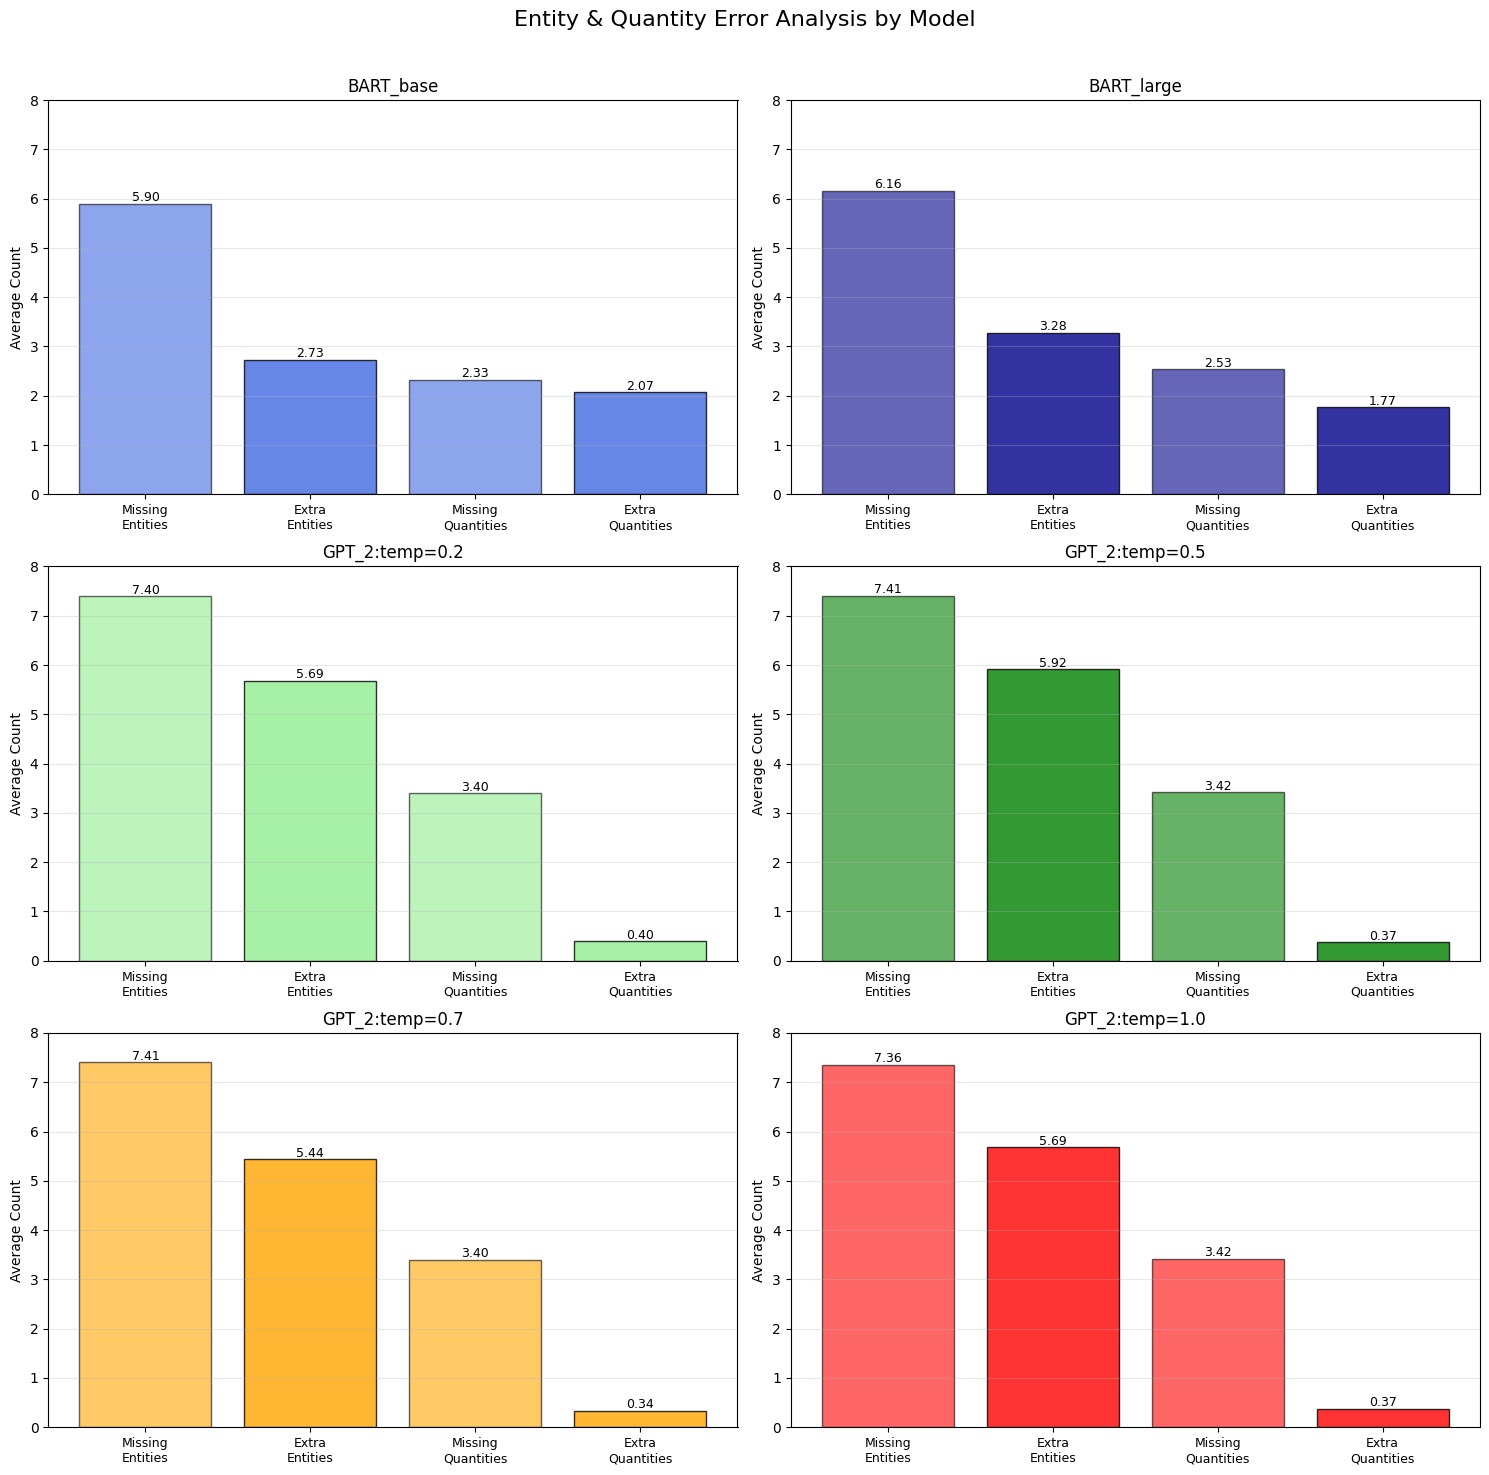

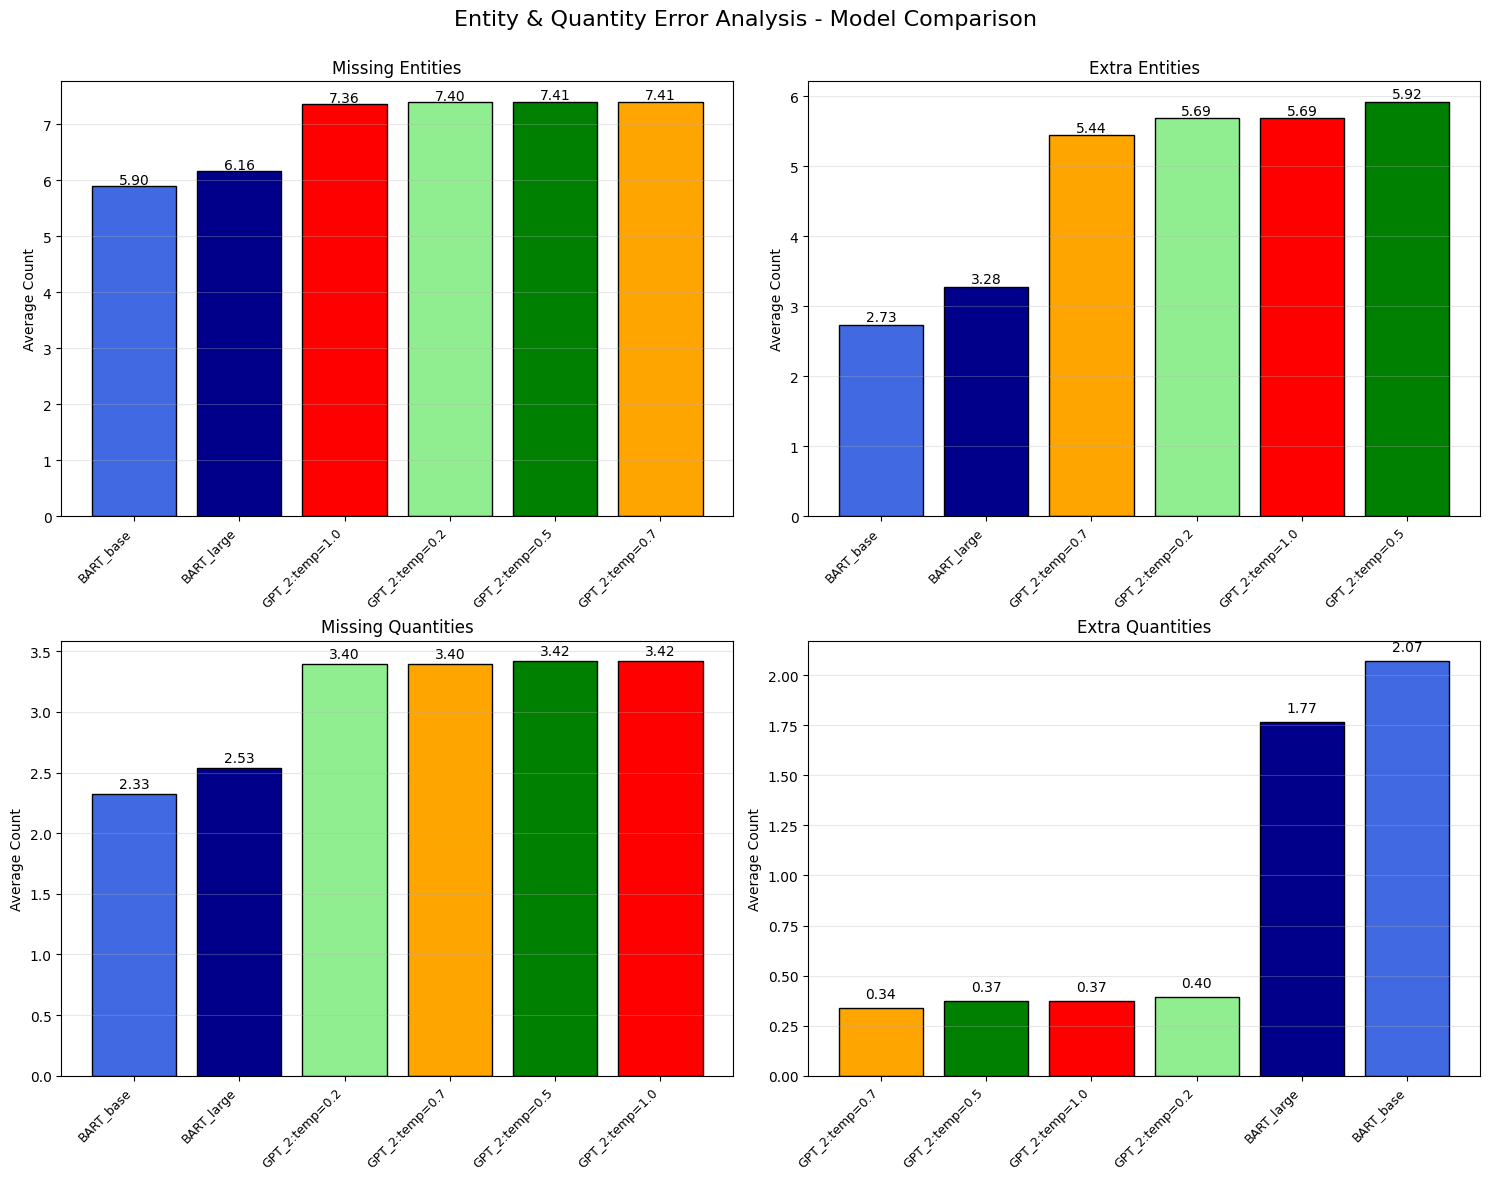


Entity & Quantity Error Comparison:


,Model,Missing Entities,Extra Entities,Missing Quantities,Extra Quantities,Sample Size
0,BART_base,5.90,2.73,2.33,2.07,86
1,BART_large,6.16,3.28,2.53,1.77,86
2,GPT_2:temp=0.2,7.40,5.69,3.40,0.40,86
3,GPT_2:temp=0.5,7.41,5.92,3.42,0.37,86
4,GPT_2:temp=0.7,7.41,5.44,3.40,0.34,86
5,GPT_2:temp=1.0,7.36,5.69,3.42,0.37,86


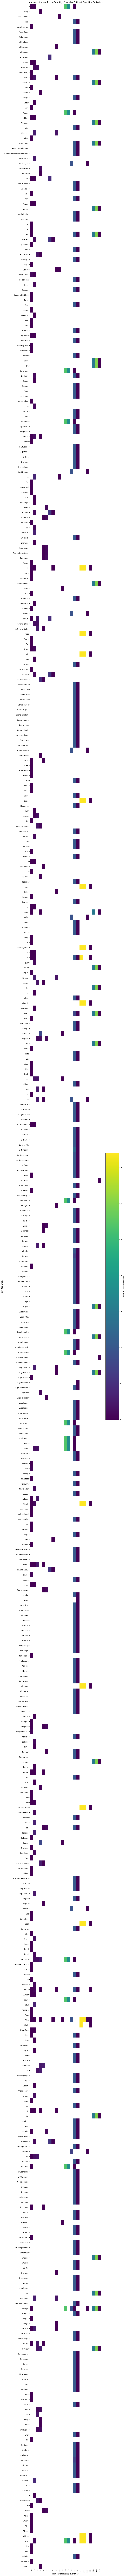


Top 5 Most Frequently Omitted Entities:
missing_entities
The      67
Suen     45
Enlil    39
A        34
Its      29
Name: count, dtype: int64

Entity Omission Analysis by Model:

BART_base most commonly misses entities: A, Its, Ningirsu

BART_large most commonly misses entities: The, A, At

GPT_2:temp=0.2 most commonly misses entities: The, Enlil, Suen

GPT_2:temp=0.5 most commonly misses entities: The, Suen, Enlil

GPT_2:temp=0.7 most commonly misses entities: The, Suen, Enlil

GPT_2:temp=1.0 most commonly misses entities: The, Suen, Enlil


In [56]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# We'll store entity results for each model
entity_results = {}
model_colors = {
    'BART_base': 'royalblue',
    'BART_large': 'darkblue',
    'GPT_2:temp=0.2': 'lightgreen',
    'GPT_2:temp=0.5': 'green',
    'GPT_2:temp=0.7': 'orange',
    'GPT_2:temp=1.0': 'red'
}

# Define regex-based extraction functions
def extract_entities_regex(text):
    """
    Extract capitalized tokens as proxy for named entities,
    e.g., 'Abba-saga', 'Lu-dingira', 'Enunugal'.
    """
    if pd.isna(text):
        return set()
    ents = re.findall(r'\b[A-Z][A-Za-z-]*\b', text)
    return set(ents)

quantity_pattern = re.compile(r'\b\d+(?:\.\d+)?(?:st|nd|rd|th)?\s+\w+')

def extract_quantities(text):
    """
    Extract quantities like "2 goats", "28th day".
    """
    if pd.isna(text):
        return set()
    return set(match.strip() for match in quantity_pattern.findall(text))

# Analyze each model
for model_col in ['BART_base', 'BART_large', 'GPT_2:temp=0.2', 'GPT_2:temp=0.5', 
                 'GPT_2:temp=0.7', 'GPT_2:temp=1.0']:
    
    # Create a temporary dataframe with only valid pairs (no NaN values)
    valid_rows = df[['english', model_col]].dropna()
    
    if len(valid_rows) == 0:
        print(f"No valid comparisons for {model_col}")
        continue
    
    # Rename columns for clarity
    temp_df = valid_rows.rename(columns={'english': 'reference', 
                                        model_col: 'generated'})
    
    # Apply extraction
    temp_df["ref_entities"] = temp_df["reference"].apply(extract_entities_regex)
    temp_df["gen_entities"] = temp_df["generated"].apply(extract_entities_regex)
    temp_df["ref_quantities"] = temp_df["reference"].apply(extract_quantities)
    temp_df["gen_quantities"] = temp_df["generated"].apply(extract_quantities)
    
    # Compute mismatches
    temp_df["missing_entities"] = temp_df.apply(lambda r: r["ref_entities"] - r["gen_entities"], axis=1)
    temp_df["extra_entities"] = temp_df.apply(lambda r: r["gen_entities"] - r["ref_entities"], axis=1)
    temp_df["missing_quantities"] = temp_df.apply(lambda r: r["ref_quantities"] - r["gen_quantities"], axis=1)
    temp_df["extra_quantities"] = temp_df.apply(lambda r: r["gen_quantities"] - r["ref_quantities"], axis=1)
    
    temp_df["num_missing_entities"] = temp_df["missing_entities"].apply(len)
    temp_df["num_extra_entities"] = temp_df["extra_entities"].apply(len)
    temp_df["num_missing_quantities"] = temp_df["missing_quantities"].apply(len)
    temp_df["num_extra_quantities"] = temp_df["extra_quantities"].apply(len)
    
    # Store results
    entity_results[model_col] = {
        'df': temp_df,
        'mean_missing_entities': temp_df["num_missing_entities"].mean(),
        'mean_extra_entities': temp_df["num_extra_entities"].mean(),
        'mean_missing_quantities': temp_df["num_missing_quantities"].mean(),
        'mean_extra_quantities': temp_df["num_extra_quantities"].mean(),
        'color': model_colors.get(model_col, 'gray')
    }
    
    # Print summary statistics
    print(f"\nEntity and Quantity Analysis for {model_col}:")
    print("\nMissing Entities Statistics:")
    print(temp_df["num_missing_entities"].describe())
    print("\nExtra Entities Statistics:")
    print(temp_df["num_extra_entities"].describe())
    print("\nMissing Quantities Statistics:")
    print(temp_df["num_missing_quantities"].describe())
    print("\nExtra Quantities Statistics:")
    print(temp_df["num_extra_quantities"].describe())
    
    # Show examples with missing entities
    print("\nExamples with Missing Entities:")
    print(temp_df[temp_df["num_missing_entities"]>0][["reference", "generated", "missing_entities"]].head(2))
    
    # Show examples with missing quantities
    print("\nExamples with Missing Quantities:")
    print(temp_df[temp_df["num_missing_quantities"]>0][["reference", "generated", "missing_quantities"]].head(2))
    
    print("\n" + "-"*50 + "\n")

# Create a 3x2 grid of histograms, one for each model
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
axes = axes.flatten()  # Flatten for easier indexing

# Plot each model in its own subplot
for i, (model_name, result) in enumerate(entity_results.items()):
    ax = axes[i]
    model_df = result['df']
    color = result['color']
    
    # Create a combined bar chart for this model
    x = np.arange(4)
    metrics = [
        model_df["num_missing_entities"].mean(),
        model_df["num_extra_entities"].mean(),
        model_df["num_missing_quantities"].mean(),
        model_df["num_extra_quantities"].mean()
    ]
    
    # Create bars individually with different alpha values
    alphas = [0.6, 0.8, 0.6, 0.8]
    for j, (metric_val, alpha_val) in enumerate(zip(metrics, alphas)):
        ax.bar(j, metric_val, color=color, alpha=alpha_val, edgecolor='black')
    
    # Add value labels on top of bars
    for j, v in enumerate(metrics):
        ax.text(j, v + 0.05, f"{v:.2f}", ha='center', fontsize=9)
    
    # Add labels and styling
    ax.set_title(f"{model_name}", fontsize=12)
    ax.set_ylabel("Average Count", fontsize=10)
    ax.set_xticks(x)
    ax.set_xticklabels(['Missing\nEntities', 'Extra\nEntities', 
                        'Missing\nQuantities', 'Extra\nQuantities'], 
                       fontsize=9, rotation=0)
    ax.grid(axis='y', alpha=0.3)
    
    # Set y-axis to be the same for all plots for fair comparison
    ax.set_ylim(0, 8)  # Adjust based on your data

# Add a big title
fig.suptitle("Entity & Quantity Error Analysis by Model", fontsize=16, y=0.98)
plt.tight_layout()
plt.subplots_adjust(top=0.92)  # Make room for the big title
plt.show()

# Create comparison bar charts for each metric
metrics_to_plot = [
    ('Missing Entities', 'mean_missing_entities', 'salmon'),
    ('Extra Entities', 'mean_extra_entities', 'lightblue'),
    ('Missing Quantities', 'mean_missing_quantities', 'orchid'),
    ('Extra Quantities', 'mean_extra_quantities', 'lightgreen')
]

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

for i, (metric_name, metric_key, base_color) in enumerate(metrics_to_plot):
    ax = axes[i]
    
    # Extract metric values for all models
    models = list(entity_results.keys())
    values = [entity_results[m][metric_key] for m in models]
    
    # Sort by metric value (ascending)
    sorted_indices = np.argsort(values)
    models = [models[j] for j in sorted_indices]
    values = [values[j] for j in sorted_indices]
    colors = [model_colors.get(m, 'gray') for m in models]
    
    # Create bar chart
    ax.bar(models, values, color=colors, edgecolor='black')
    
    # Add value labels on top of bars
    for j, v in enumerate(values):
        ax.text(j, v + 0.05, f"{v:.2f}", ha='center')
    
    ax.set_title(f"{metric_name}", fontsize=12)
    ax.set_ylabel("Average Count", fontsize=10)
    ax.set_xticks(range(len(models)))
    ax.set_xticklabels(models, rotation=45, ha='right', fontsize=9)
    ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.subplots_adjust(top=0.92)
fig.suptitle("Entity & Quantity Error Analysis - Model Comparison", fontsize=16, y=0.98)
plt.show()

# Create a data table for comparison
comparison_data = {
    'Model': list(entity_results.keys()),
    'Missing Entities': [f"{entity_results[m]['mean_missing_entities']:.2f}" for m in entity_results],
    'Extra Entities': [f"{entity_results[m]['mean_extra_entities']:.2f}" for m in entity_results],
    'Missing Quantities': [f"{entity_results[m]['mean_missing_quantities']:.2f}" for m in entity_results],
    'Extra Quantities': [f"{entity_results[m]['mean_extra_quantities']:.2f}" for m in entity_results],
    'Sample Size': [len(entity_results[m]['df']) for m in entity_results]
}

comparison_df = pd.DataFrame(comparison_data)
print("\nEntity & Quantity Error Comparison:")
display(comparison_df)

# Create a combined dataframe from all models for the heatmap analysis
combined_df = pd.DataFrame()

for model_name, result in entity_results.items():
    model_df = result['df'].copy()
    model_df['model'] = model_name  # Add model identifier
    combined_df = pd.concat([combined_df, model_df], ignore_index=True)

# Now create the heatmap visualization
if not combined_df.empty:
    # Explode the missing_entities column to get one row per entity
    ent = combined_df.explode('missing_entities').dropna(subset=['missing_entities'])
    
    if not ent.empty:
        # Create pivot table of missing entities vs missing quantities
        pivot = ent.pivot_table(
            index='missing_entities',
            columns='num_missing_quantities',   
            values='num_extra_quantities',
            aggfunc='mean'
        )
        
        if not pivot.empty and pivot.shape[0] > 0 and pivot.shape[1] > 0:
            plt.figure(figsize=(10, max(6, len(pivot)*0.4)))
            plt.imshow(pivot.values, aspect='auto', cmap='viridis')
            plt.xticks(np.arange(pivot.shape[1]), pivot.columns, rotation=90)
            plt.yticks(np.arange(pivot.shape[0]), pivot.index)
            plt.xlabel("Number of Missing Quantities")
            plt.ylabel("Omitted Entity")
            plt.title("Heatmap of Mean Extra-Quantity Errors by Entity & Quantity Omissions")
            plt.colorbar(label="Mean # Extra Quantities")
            plt.tight_layout()
            plt.show()
            
            # Print the top 5 most frequently omitted entities
            entity_counts = ent['missing_entities'].value_counts().head(5)
            print("\nTop 5 Most Frequently Omitted Entities:")
            print(entity_counts)
        else:
            print("Pivot table is empty or has invalid dimensions. Cannot create heatmap.")
    else:
        print("No entities found after filtering. Cannot create heatmap.")
else:
    print("No data available for heatmap visualization.")

# Add model-specific entity omission analysis
print("\nEntity Omission Analysis by Model:")
for model_name, result in entity_results.items():
    model_df = result['df']
    
    # Find most commonly missed entities for this model
    all_missed = []
    for entities in model_df['missing_entities']:
        # Fixed: Add all items from the set to the list
        all_missed.extend(list(entities))
    
    if all_missed:
        top_entities = pd.Series(all_missed).value_counts().head(3)
        print(f"\n{model_name} most commonly misses entities: {', '.join(top_entities.index)}")


Top 10 Most Frequently Omitted Entities:
missing_entities
The       67
Suen      45
Enlil     39
A         34
Its       29
Ur        24
In        24
At        23
It        23
Inanna    21
Name: count, dtype: int64


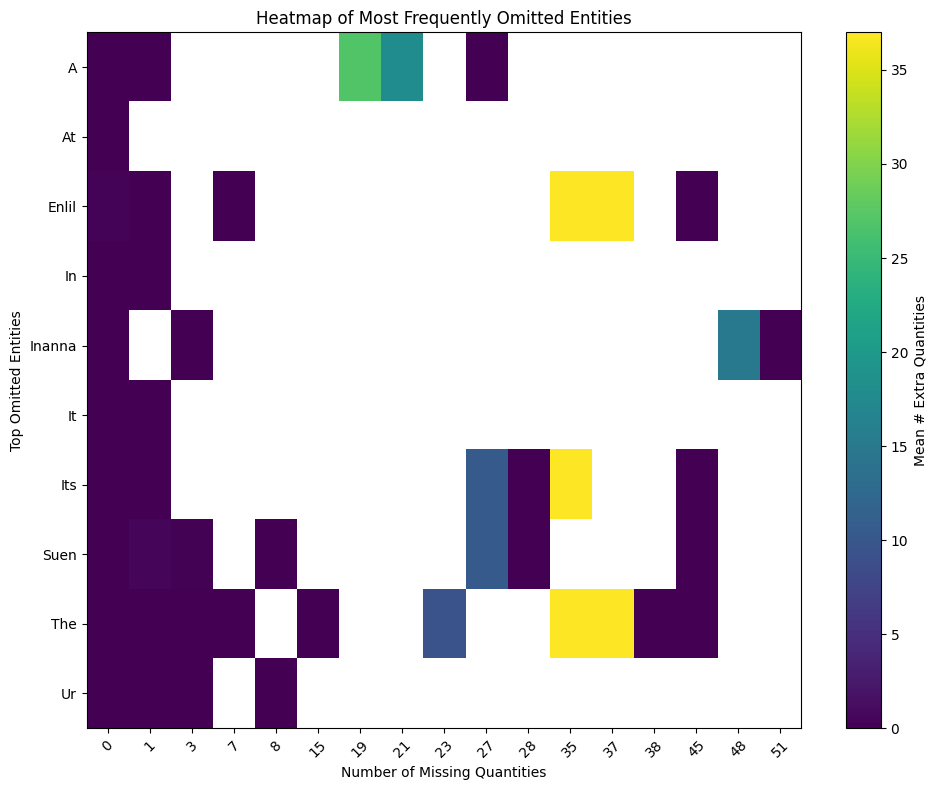


Model-specific analysis of top entities:

Omission rates for entity 'The':
model
GPT_2:temp=1.0    15
GPT_2:temp=0.2    14
GPT_2:temp=0.5    14
GPT_2:temp=0.7    14
BART_large         6
BART_base          4
Name: count, dtype: int64

Omission rates for entity 'Suen':
model
GPT_2:temp=0.5    10
GPT_2:temp=0.2     9
GPT_2:temp=0.7     9
GPT_2:temp=1.0     9
BART_large         4
BART_base          4
Name: count, dtype: int64

Omission rates for entity 'Enlil':
model
GPT_2:temp=0.5    9
GPT_2:temp=0.2    9
GPT_2:temp=0.7    9
GPT_2:temp=1.0    8
BART_large        3
BART_base         1
Name: count, dtype: int64


In [48]:
import numpy as np
import matplotlib.pyplot as plt

# Create a combined dataframe from all models for the heatmap analysis
combined_df = pd.DataFrame()

for model_name, result in entity_results.items():
    model_df = result['df'].copy()
    model_df['model'] = model_name  # Add model identifier
    combined_df = pd.concat([combined_df, model_df], ignore_index=True)

# Now create the exploded dataframe of entities
ent = combined_df.explode('missing_entities').dropna(subset=['missing_entities'])

# Get the top 10 most frequently omitted entities
top_entities = ent['missing_entities'].value_counts().head(10)
print("\nTop 10 Most Frequently Omitted Entities:")
print(top_entities)

# Filter the dataframe to include only these top entities
top_ent = ent[ent['missing_entities'].isin(top_entities.index)]

# Create pivot table for just the top entities
pivot = top_ent.pivot_table(
    index='missing_entities',
    columns='num_missing_quantities',   
    values='num_extra_quantities',
    aggfunc='mean'
)

# Create visualization for the top entities only
if not pivot.empty and pivot.shape[0] > 0 and pivot.shape[1] > 0:
    plt.figure(figsize=(10, 8))
    plt.imshow(pivot.values, aspect='auto', cmap='viridis')
    plt.xticks(np.arange(pivot.shape[1]), pivot.columns, rotation=45)
    plt.yticks(np.arange(pivot.shape[0]), pivot.index)
    plt.xlabel("Number of Missing Quantities")
    plt.ylabel("Top Omitted Entities")
    plt.title("Heatmap of Most Frequently Omitted Entities")
    plt.colorbar(label="Mean # Extra Quantities")
    plt.tight_layout()
    plt.show()
    
    # Show per-model breakdown of the top 3 entities
    print("\nModel-specific analysis of top entities:")
    top3_entities = top_entities.head(3).index
    
    for entity in top3_entities:
        print(f"\nOmission rates for entity '{entity}':")
        entity_by_model = ent[ent['missing_entities'] == entity]['model'].value_counts().sort_values(ascending=False)
        print(entity_by_model)
else:
    print("Pivot table is empty or has invalid dimensions. Cannot create heatmap.")